## Submission Deadline 111111

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

In [257]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

print(X)

y


      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [258]:
yclass = set(y["class"])
print(yclass)

{'notckd', 'ckd\t', 'ckd'}


1.Classification Problem Identification:\
a.Looking at the introduction of the predict variable y, it is catogorical and only assigned 2 types of observations: people who have cronical desease and people who does not have cronical desease. But look at the data, there is one addiction type which is called 'ckd\t', which could understanded as wrong input. In this case we convert group with this term to people who have cronical desease.\

b.The dm has same input error of "'\tno'", we also use the same trick to convert this into no.\

c.The datatype of includes both catogorical data and nominal data, we need to convert the object into categorical data. Also,there is outliers in this data.

In [259]:
for i in y["class"]:
    if i == "ckd\t":
        y["class"].replace("ckd\t", "ckd", inplace=True)


/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_80397/1546460364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"].replace("ckd\t", "ckd", inplace=True)


In [260]:
yclass = set(y["class"])
yclass

{'ckd', 'notckd'}

In [261]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [262]:
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
num_categories = X[obj_columns].nunique()
num_categories

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       3
cad      2
appet    2
pe       2
ane      2
dtype: int64

In [263]:
dmclass = set(X["dm"])
print(dmclass)
#we see the dm has same input error of "'\tno'"

{'\tno', 'no', nan, 'yes'}


In [264]:
for i in X["dm"]:
    if i == "\tno":
        X["dm"].replace("\tno", "no", inplace=True)

/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_80397/2459818985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dm"].replace("\tno", "no", inplace=True)


2.We need to do the variable tranformation, which convert the catogorical data into 0 and 1, then scale it

In [265]:
dmclass = set(X["dm"])
print(dmclass)

{'no', nan, 'yes'}


In [266]:
## variable tranformation
import pandas as pd
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
columns_to_convert_1 = ["pcc", "ba"]
columns_to_convert_2 = ["rbc", "pc"]
columns_to_convert_3 = ["htn", "dm", "cad", "pe", "ane"]
columns_to_convert_4 = ["appet"]

X_reg = X.copy()

for col in columns_to_convert_1:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["notpresent", "present"], 
        ordered=True
    )

for col in columns_to_convert_2:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["abnormal", "normal"], 
        ordered=True
    )

for col in columns_to_convert_3:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["no","yes"], 
        ordered=True
    )

for col in columns_to_convert_4:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["poor","good"], 
        ordered=True
    )


for col in obj_columns:
    X_reg[col] = X_reg[col].astype('category').cat.codes
X_reg.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         int8
pc          int8
pcc         int8
ba          int8
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn         int8
dm          int8
cad         int8
appet       int8
pe          int8
ane         int8
dtype: object

In [267]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

Scale the numerical data 

In [268]:
numerical=X_reg.select_dtypes(include='float64').columns
numerical_data = X_reg[numerical]
scale = StandardScaler()
X_reg[numerical] = scale.fit_transform(numerical_data)
X_reg


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,1,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,1,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,0,0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,0,1,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,1,0,0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,1,0,0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,1,0,0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,1,0,0


Question 3: Dataset Overview: Provide a detailed description of the dataset, covering variables, sum
maries, observation counts, data types, and distributions (at least three statements).



In [269]:
##distribution

4.Association

In [270]:
##check variance usinf heat map

<Axes: >

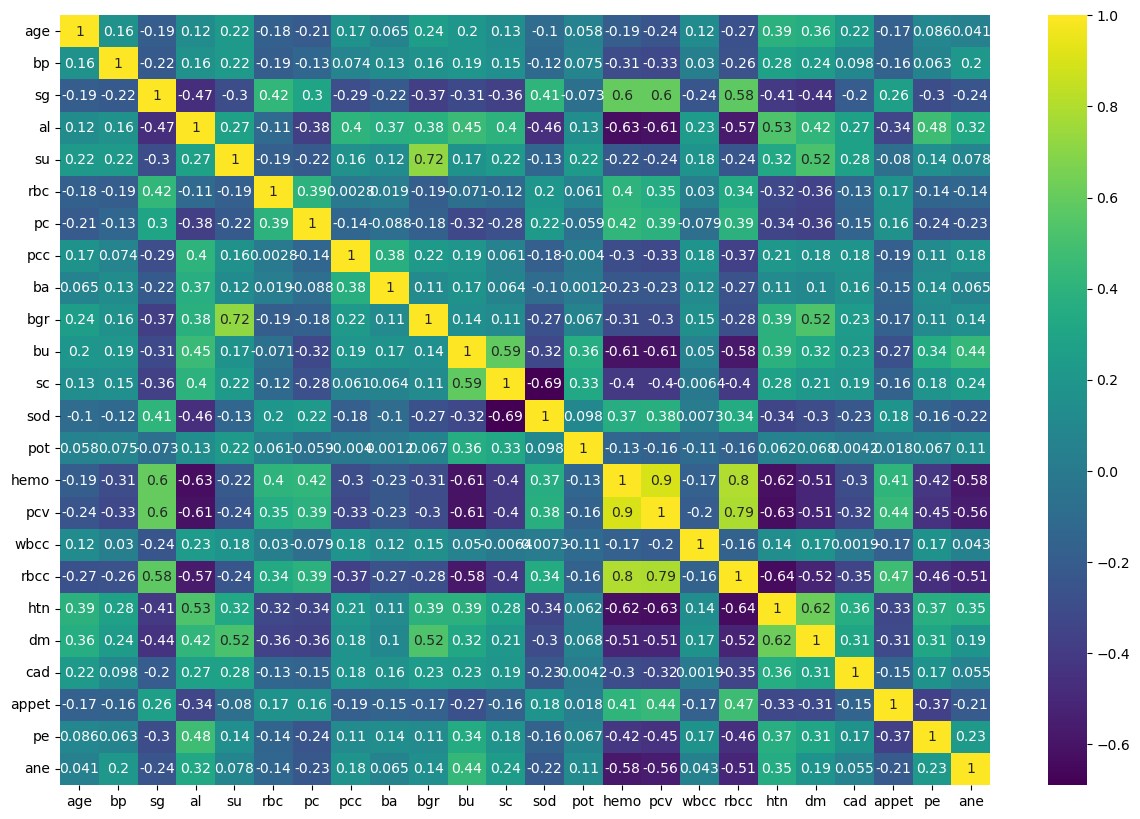

In [271]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_reg.corr(), annot=True,cmap='viridis')

In [272]:
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [273]:
na_numerical=X_reg[numerical].isna()
sum1=na_numerical.sum()
na_categorical = (X_reg[obj_columns] == -1)
sum2=na_categorical.sum()

In [274]:
print(sum1)
print(sum2)

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [275]:
from sklearn.impute import KNNImputer
import pandas as pd

for i in obj_columns:
    X_reg.loc[X_reg[i] == -1, i] = np.nan
print(X_reg)

          age        bp        sg        al        su  rbc   pc  pcc   ba  \
0   -0.203139  0.258373  0.454071 -0.012548 -0.410106  NaN  1.0  0.0  0.0   
1   -2.594124 -1.936857  0.454071  2.208413 -0.410106  NaN  1.0  0.0  0.0   
2    0.613295  0.258373 -1.297699  0.727772  2.323069  1.0  1.0  0.0  0.0   
3   -0.203139 -0.473370 -2.173584  2.208413 -0.410106  1.0  0.0  1.0  0.0   
4   -0.028189  0.258373 -1.297699  0.727772 -0.410106  1.0  1.0  0.0  0.0   
..        ...       ...       ...       ...       ...  ...  ...  ...  ...   
395  0.205078  0.258373  0.454071 -0.752868 -0.410106  1.0  1.0  0.0  0.0   
396 -0.553039 -0.473370  1.329955 -0.752868 -0.410106  1.0  1.0  0.0  0.0   
397 -2.302541  0.258373  0.454071 -0.752868 -0.410106  1.0  1.0  0.0  0.0   
398 -2.010957 -1.205114  1.329955 -0.752868 -0.410106  1.0  1.0  0.0  0.0   
399  0.380028  0.258373  1.329955 -0.752868 -0.410106  1.0  1.0  0.0  0.0   

          bgr  ...      hemo       pcv      wbcc      rbcc  htn   dm  cad  

In [276]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_reg), columns=X_reg.columns)
X_imputed.head()
X_imputed.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [277]:
X_imputed 


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,1.0,1.0,0.0,0.0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,0.4,1.0,0.0,0.0,-0.740638,...,-0.421688,-0.098536,-0.818559,0.618092,0.0,0.0,0.0,1.0,0.0,0.0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064,...,-1.006202,-0.878356,-0.308261,-0.495825,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0.0,0.0,0.0,1.0,0.0,0.0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0.0,0.0,0.0,1.0,0.0,0.0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0.0,0.0,0.0,1.0,0.0,0.0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0.0,0.0,0.0,1.0,0.0,0.0


outlier analysis

In [278]:
## decision tree

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet, RidgeClassifierCV, LassoCV, ElasticNetCV

In [376]:
y['class'] = y["class"].astype('category').cat.codes
y

/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_80397/3718594032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes


,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [282]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.75, random_state=0, stratify=y)

In [283]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10, max_iter=1500)

In [284]:
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.012618568830660211

In [285]:
#test MSE associated with this value of $\lambda$
m_lasso = Lasso(alpha=lasso_cv.alpha_)
m_lasso.fit(X_train, y_train) 
m_lasso_pre_logOdds = m_lasso.predict(X_test)

In [304]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

m_lasso_pre_prob = logistic(m_lasso_pre_logOdds)
m_lasso_pre_prob

array([0.44086483, 0.51441725, 0.69323586, 0.49712919, 0.66615511,
       0.57966322, 0.70457194, 0.63245133, 0.67848571, 0.66123471,
       0.37095104, 0.48805817, 0.69979801, 0.52874926, 0.52210314,
       0.70533216, 0.61421869, 0.57317382, 0.52124418, 0.70477166,
       0.50519023, 0.68747117, 0.57069451, 0.51881593, 0.56191864,
       0.5526907 , 0.66947246, 0.54386621, 0.42635546, 0.66554088,
       0.45130434, 0.55713538, 0.56332208, 0.72728027, 0.65587001,
       0.68632671, 0.67500137, 0.65281188, 0.56017791, 0.70151425,
       0.6852735 , 0.37566708, 0.52298572, 0.71692402, 0.6055935 ,
       0.51498502, 0.71097997, 0.65520284, 0.72742017, 0.70519847,
       0.64149487, 0.68332603, 0.57897785, 0.6824387 , 0.51220224,
       0.61553054, 0.50994145, 0.68340125, 0.36707897, 0.5648132 ,
       0.45186662, 0.52664428, 0.61370793, 0.53593559, 0.52923656,
       0.48158262, 0.69506921, 0.46881475, 0.67349209, 0.57806773,
       0.57959558, 0.69357614, 0.61230855, 0.59163348, 0.57453

In [305]:
m_lasso_pre_prob_flat = np.ravel(m_lasso_pre_prob)
y_test_flat = np.ravel(y_test)
df = pd.DataFrame(data={'prob': m_lasso_pre_prob_flat, 'y_test': y_test_flat})
df

,prob,y_test
0,0.440865,0
1,0.514417,0
2,0.693236,1
3,0.497129,0
4,0.666155,1
...,...,...
295,0.658833,1
296,0.547806,0
297,0.508358,0
298,0.602686,0


In [288]:
fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.6552028431872113

In [289]:
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])
df['y_test_pred'] = df.prob.map(lambda x: 1 if x>0.6552 else 0)
accuracy_score(df.y_test, df.y_test_pred)

[0.99107143]
[0.97340426]


0.98

In [290]:
m_lasso.coef_

array([-0.        , -0.02206391,  0.13432129, -0.10426308, -0.00789668,
        0.04103003,  0.        , -0.        , -0.        , -0.        ,
        0.05105176,  0.        ,  0.11025656,  0.        ,  0.03991314,
        0.10307795, -0.02107742,  0.06985076, -0.02756131, -0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [292]:
##forward selection
sfs = SFS(
    lasso_cv,
    k_features=(1,15),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [293]:
sfs = sfs.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A 

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A 

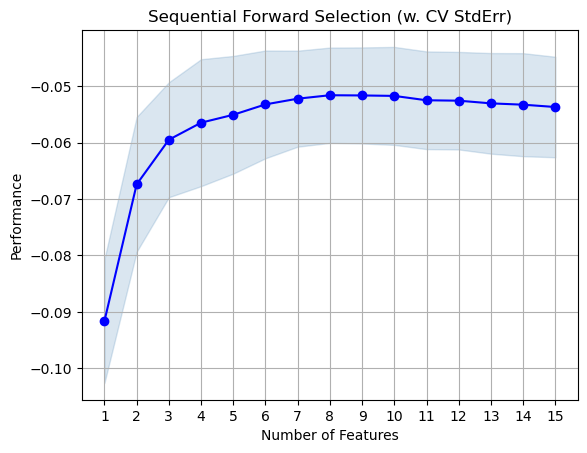

In [294]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

In [295]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['bp', 'sg', 'al', 'sc', 'sod', 'pcv', 'rbcc', 'pe'], dtype='object')

In [296]:
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]

fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.6552028431872113

In [308]:
lasso_cv.fit(X_train_sfs, y_train)
sfs_predict = lasso_cv.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_predict))

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.30938555774168636

In [312]:
lasso_cv.coef_

array([-0.04772641,  0.14763378, -0.1129292 ,  0.11708966,  0.13950557,
        0.14002345,  0.08297065, -0.03069936])

## Dicision tree

In [314]:
decision_tree = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0)

In [315]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        75\n           1       0.98      0.96      0.97        45\n\n    accuracy                           0.97       120\n   macro avg       0.98      0.97      0.97       120\nweighted avg       0.98      0.97      0.97       120\n'

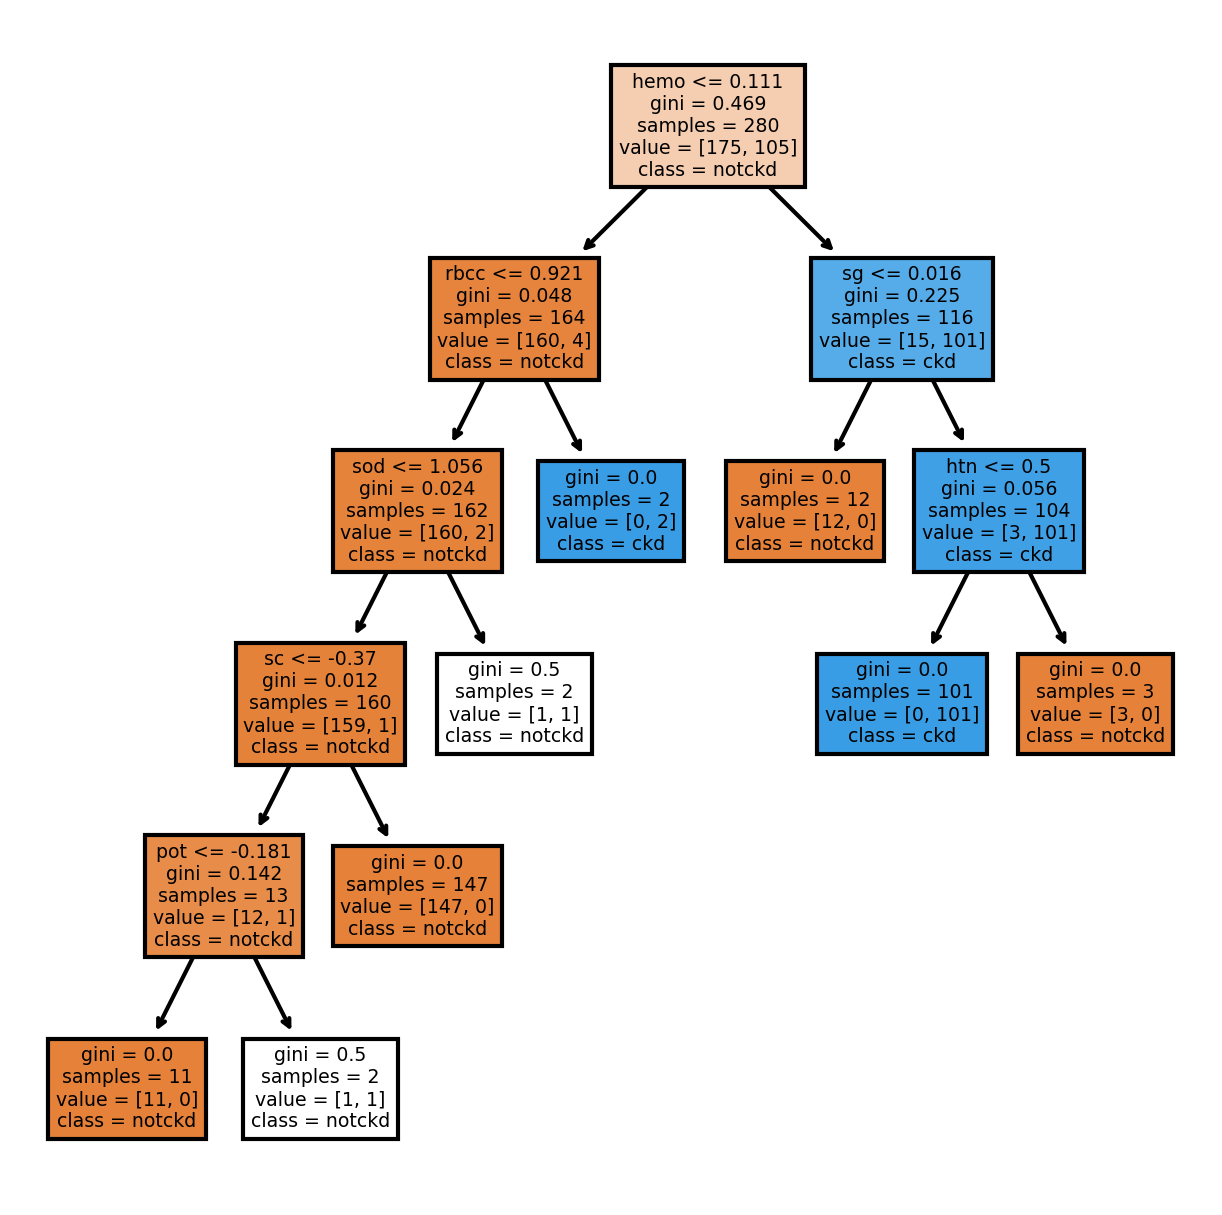

In [358]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y, test_size=0.3, random_state=0, stratify=y)

cs_dt = DecisionTreeClassifier(max_depth =20, random_state=0)

cs_dt.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(
    cs_dt,
    max_depth= 5, 
    feature_names = X_train.columns.tolist(),
    class_names=['notckd', 'ckd'],
    filled = True
    )

pred = cs_dt.predict(X_test)

print(classification_report(y_test, pred))
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

cs_dt.score(X_test, y_test)
classification_report(y_test, pred)

In [324]:
path = cs_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [325]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [326]:
depth = [clf.tree_.max_depth for clf in clfs]
depth

[5, 3, 3, 3, 2, 1, 0]

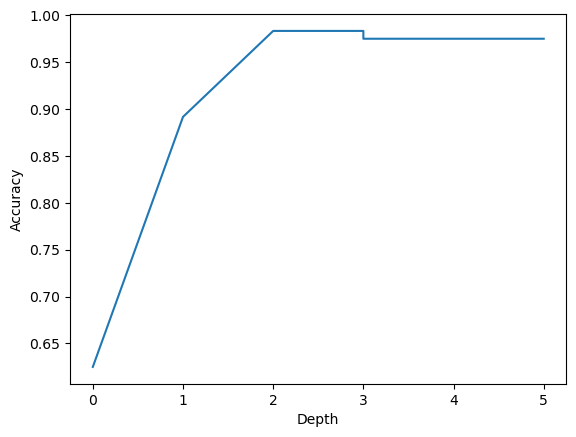

In [328]:
test_score = [clf.score(X_test, y_test) for clf in clfs]
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()## choose 3

In [345]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 2, 
    random_state=0
    ) 
cs_dt_best.fit(X_imputed, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [346]:
fea_imp = cs_dt_best.feature_importances_
sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

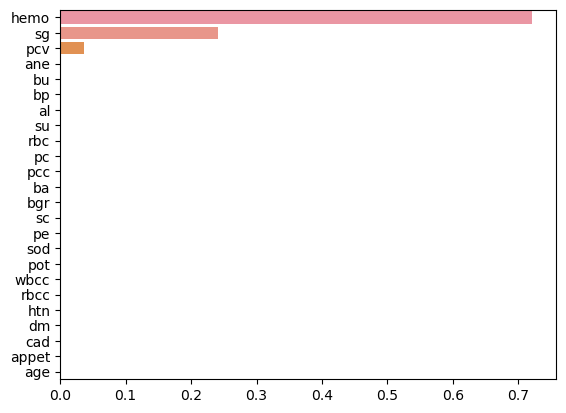

In [347]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

In [350]:
cs_dt_best._parameter_constraints

{'splitter': [<sklearn.utils._param_validation.StrOptions at 0x14080fc90>],
 'max_depth': [<sklearn.utils._param_validation.Interval at 0x141d59c50>,
  None],
 'min_samples_split': [<sklearn.utils._param_validation.Interval at 0x141d59050>,
 'min_samples_leaf': [<sklearn.utils._param_validation.Interval at 0x141d58fd0>,
 'min_weight_fraction_leaf': [<sklearn.utils._param_validation.Interval at 0x141d59a10>],
 'max_features': [<sklearn.utils._param_validation.Interval at 0x141d59950>,
  None],
 'random_state': ['random_state'],
 'max_leaf_nodes': [<sklearn.utils._param_validation.Interval at 0x141d5a850>,
  None],
 'min_impurity_decrease': [<sklearn.utils._param_validation.Interval at 0x141d5a7d0>],
 'ccp_alpha': [<sklearn.utils._param_validation.Interval at 0x14247c150>],
 'criterion': [<sklearn.utils._param_validation.StrOptions at 0x14247f690>,
 'class_weight': [dict,
  list,
  None]}

In [ ]:
### logistic regression

In [359]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.75, random_state=0, stratify=y)

In [360]:
logistic_X = LogisticRegression()

In [361]:
logistic_X.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [369]:
pred_prob = logistic_X.predict_proba(X_test)
pred_prob

array([[9.99987999e-01, 1.20007950e-05],
       [9.97609528e-01, 2.39047242e-03],
       [6.58097214e-02, 9.34190279e-01],
       [9.99637245e-01, 3.62754677e-04],
       [1.43532236e-01, 8.56467764e-01],
       [9.46468727e-01, 5.35312726e-02],
       [5.01875552e-02, 9.49812445e-01],
       [6.05556747e-01, 3.94443253e-01],
       [1.19363820e-01, 8.80636180e-01],
       [1.90071872e-01, 8.09928128e-01],
       [9.99992163e-01, 7.83747339e-06],
       [9.97324629e-01, 2.67537099e-03],
       [5.30092778e-02, 9.46990722e-01],
       [9.99280746e-01, 7.19253550e-04],
       [9.95155151e-01, 4.84484948e-03],
       [4.13235678e-02, 9.58676432e-01],
       [6.47438851e-01, 3.52561149e-01],
       [9.85201776e-01, 1.47982235e-02],
       [9.88315179e-01, 1.16848214e-02],
       [3.55673753e-02, 9.64432625e-01],
       [9.98724077e-01, 1.27592336e-03],
       [8.76493840e-02, 9.12350616e-01],
       [9.23905458e-01, 7.60945419e-02],
       [9.97723578e-01, 2.27642220e-03],
       [9.305989

In [372]:
positive_class_prob = pred_prob[:, 1]
df2 = pd.DataFrame(data={'prob': positive_class_prob, 'y_test': y_test})
df2

,prob,y_test
0,1.200080e-05,0
1,2.390472e-03,0
2,9.341903e-01,1
3,3.627547e-04,0
4,8.564678e-01,1
...,...,...
295,7.893086e-01,1
296,2.764880e-03,0
297,9.290898e-04,0
298,4.227675e-02,0


In [375]:
## caculated best threshhold is 0.6552
ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])
df2['y_test_pred'] = df.prob.map(lambda x: 1 if x>0.6552 else 0)
accuracy_score(df2.y_test, df2.y_test_pred)

[0.99107143]
[0.97340426]


0.98

In [377]:
##K-means
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm  # Import colormap directly from matplotlib.cm


In [378]:
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(y)
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

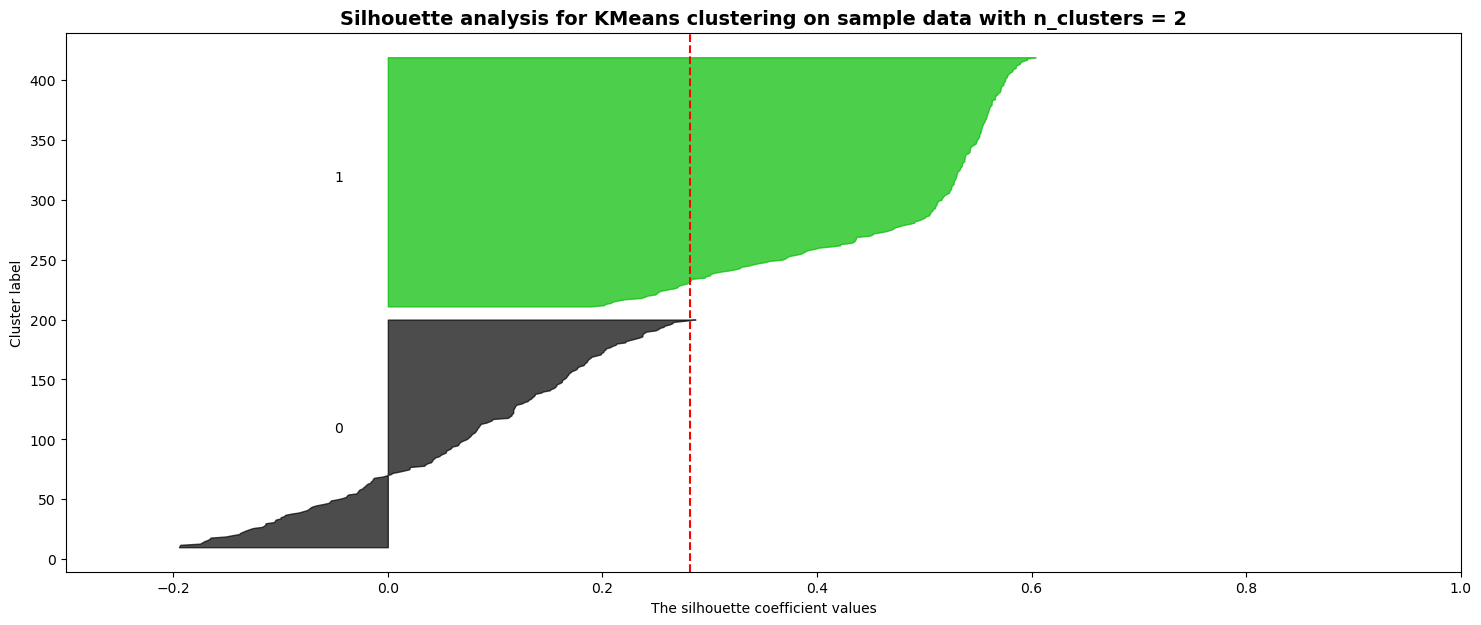

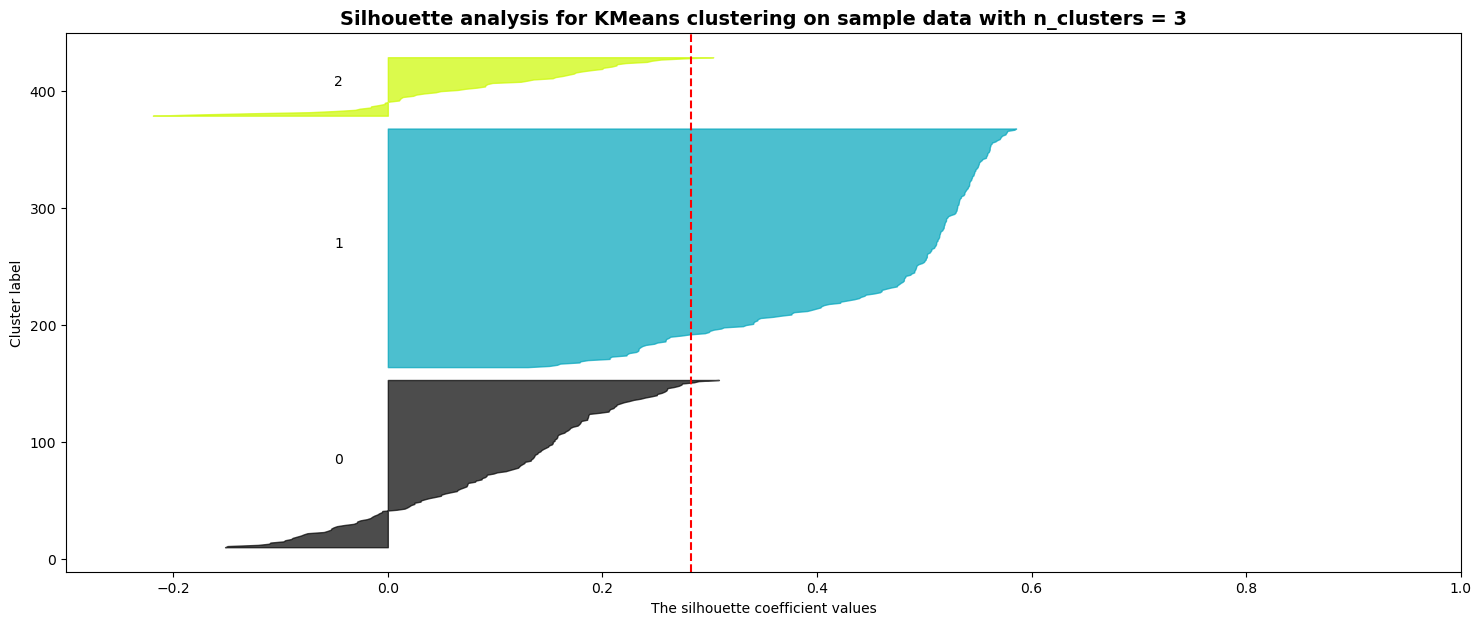

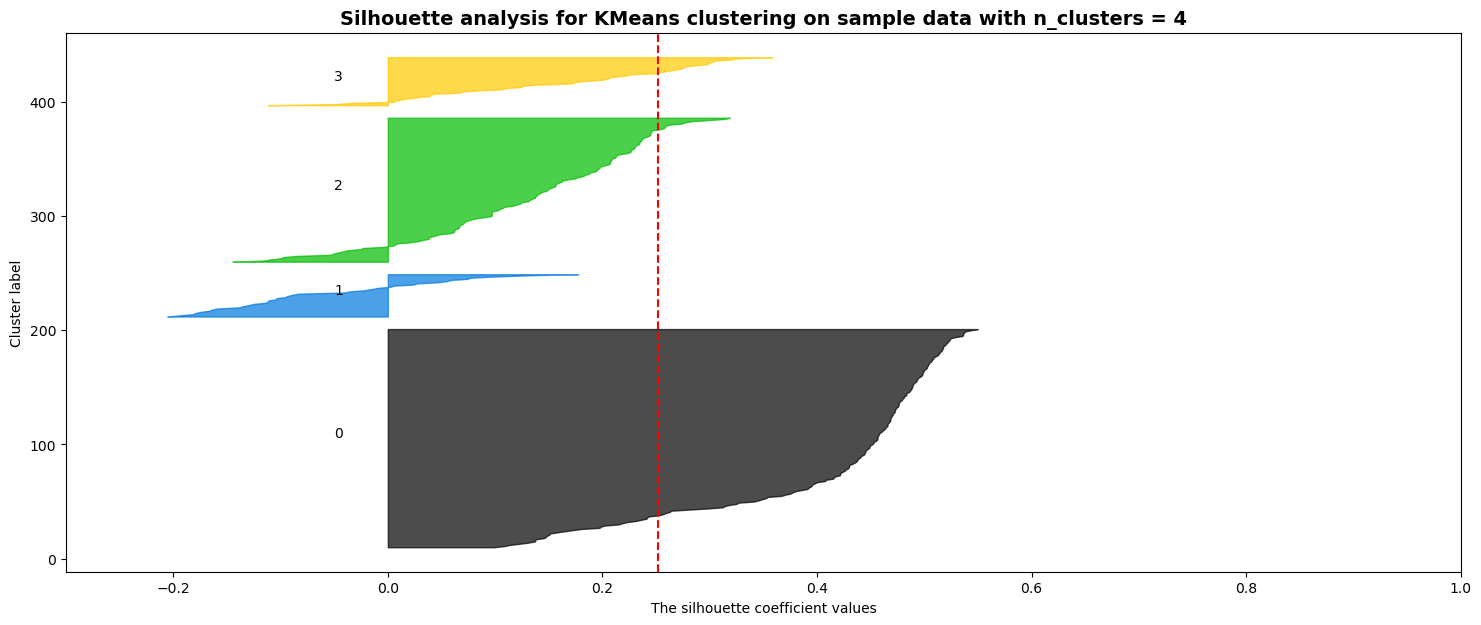

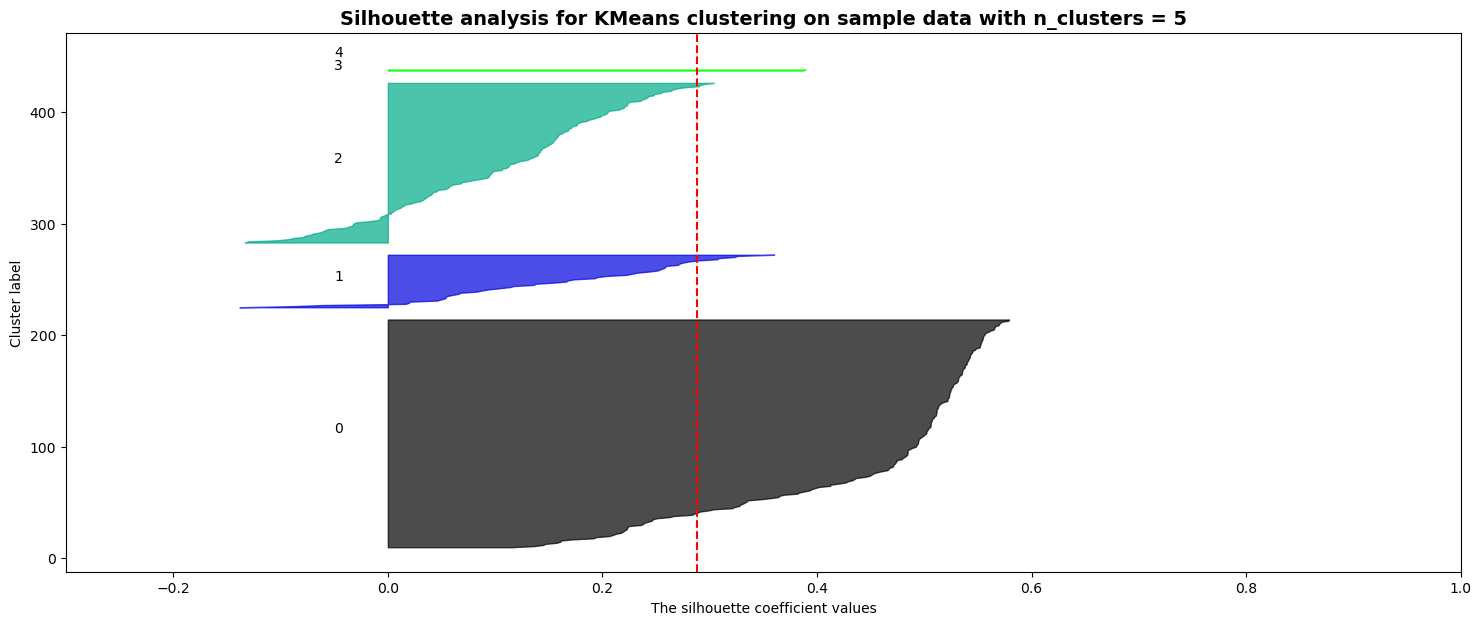

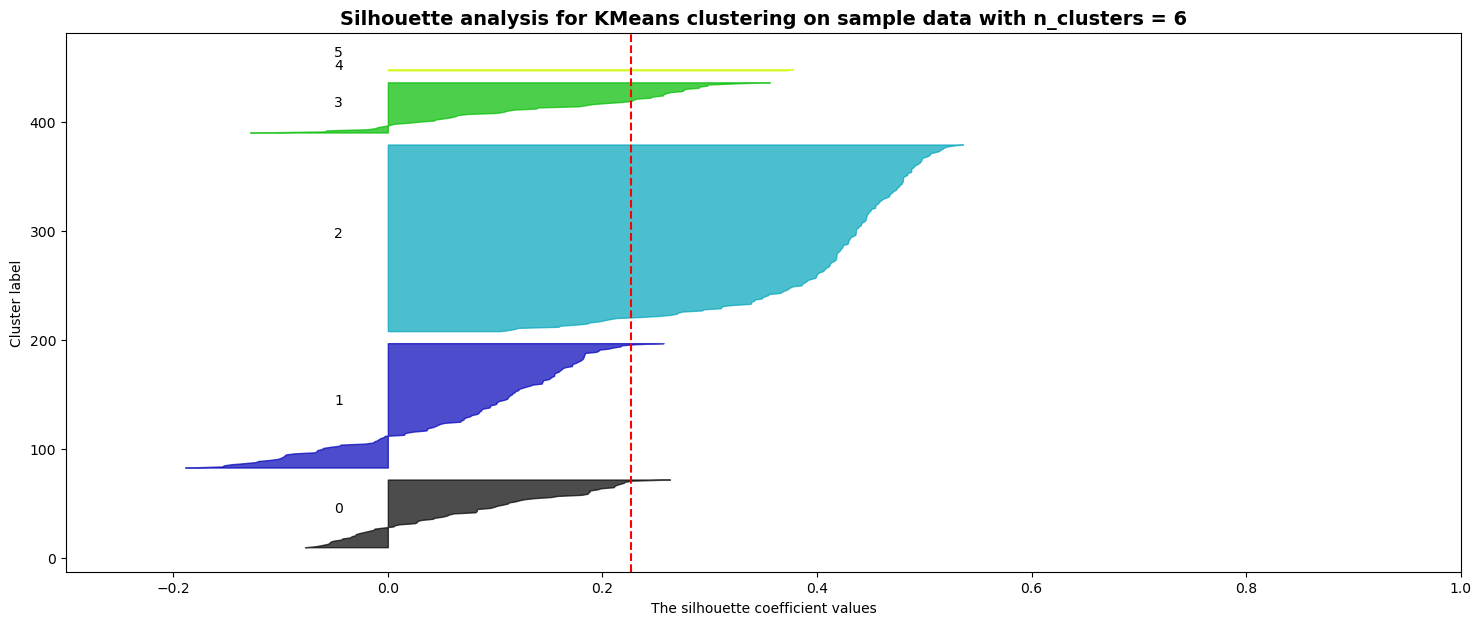

In [397]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    labels = km.fit_predict(X_imputed)
    
    silhouette_avg = silhouette_score(X_imputed, labels)
    sample_silhouette_values = silhouette_samples(X_imputed, labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [403]:
#pick 5
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
labels = kmeans.fit_predict(y)
labels

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [414]:
#we have to do PCA
pca_X = PCA()
X = pd.DataFrame(X_imputed, X_imputed.index, X_imputed.columns)

In [417]:
pca_loading = pd.DataFrame(pca_X.fit(X).components_.T, index=X_imputed.columns, columns=[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
            'pc21', 'pc22', 'pc23', 'pc24']])
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
age,0.168598,-0.240408,0.158960,-0.284249,-0.606741,-0.576431,-0.095853,0.106189,0.200896,0.025866,...,0.079379,0.070998,0.009479,-0.000396,-0.056716,-0.004420,0.044788,-0.011473,-0.024484,-0.009789
bp,0.171513,-0.128128,0.058131,-0.531900,-0.286360,0.675904,0.305385,0.088047,0.106973,0.036870,...,-0.021728,0.015403,0.002121,0.001481,-0.018820,0.049392,0.041880,0.014880,0.021211,-0.015823
sg,-0.297049,0.072605,0.200349,-0.135612,0.013405,-0.022545,-0.031016,0.708320,-0.516423,0.221372,...,0.010704,0.033268,-0.061652,0.038359,0.014671,-0.019687,0.039740,-0.015474,0.024731,0.018353
al,0.294427,-0.004966,-0.236783,0.123125,0.279043,0.005266,-0.007804,0.563655,0.551865,0.052240,...,-0.168072,0.104700,0.023141,-0.182357,-0.035916,-0.012670,0.079979,0.006249,-0.025348,-0.079295
su,0.200541,-0.555095,0.280059,0.083332,0.222416,0.082062,0.003858,-0.062628,-0.144108,-0.116710,...,0.170558,0.040022,0.056437,-0.023898,-0.002278,-0.036093,-0.085817,-0.090006,-0.001515,-0.012432
rbc,-0.082631,-0.003949,0.041317,-0.012053,0.030427,-0.057673,0.058811,-0.029175,-0.062101,0.027810,...,-0.026994,-0.174250,0.533577,-0.258664,0.162791,0.541196,0.429837,-0.166357,-0.191723,-0.082681
pc,-0.100789,-0.011799,0.044124,0.004317,-0.061693,-0.013476,0.035741,-0.107091,-0.081218,-0.024059,...,-0.392437,0.361423,0.032594,-0.494486,-0.175594,0.162175,-0.018213,0.160482,0.486748,0.206826
pcc,0.047985,-0.017851,-0.049619,0.026727,0.007778,-0.025811,0.000077,0.062620,0.059739,0.017995,...,0.278652,-0.259502,0.062176,0.049676,0.432969,-0.011480,0.038503,0.108815,0.740325,0.057990
ba,0.025758,-0.003172,-0.031235,0.004966,0.019068,0.009022,0.012699,0.046422,0.061534,-0.014641,...,0.120186,-0.021474,-0.098479,-0.023089,0.100456,0.119658,-0.003453,0.035974,-0.233725,0.933948
bgr,0.216002,-0.522655,0.191742,0.227184,0.111167,0.085952,-0.176952,0.090679,-0.162280,-0.047176,...,-0.066185,0.002112,-0.021582,-0.023281,-0.118231,0.068892,0.040966,0.016413,0.026522,0.018901


In [418]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
            'pc21', 'pc22', 'pc23', 'pc24'], index=X.index)
pc_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
0,-1.233701,-0.126973,0.150920,-0.131972,-0.250196,0.281491,0.083537,0.453735,0.379249,0.181552,...,-0.828413,-0.458455,0.208522,-0.015305,0.377872,-0.158365,0.097904,0.021097,-0.037843,0.086682
1,-1.107744,1.357692,-1.365524,1.913247,2.353969,0.639474,-1.011073,0.945105,0.709078,0.466562,...,-0.410160,0.353447,-0.295087,-0.280966,0.024930,-0.128957,-0.054815,-0.035743,0.067281,-0.152160
2,2.892192,-3.039637,0.561592,1.007859,0.427122,0.592242,-1.165304,-0.375394,-0.391846,-0.117136,...,0.428762,0.803307,0.548282,-0.870281,-0.078366,-0.093407,0.506031,0.210399,-0.228067,-0.115871
3,2.458014,1.319074,-1.098029,2.055315,-0.319770,0.430193,-0.787946,0.128804,2.063175,0.666802,...,0.852519,-0.262902,1.229924,-0.289236,-0.130705,-0.081590,-0.117023,-0.074335,0.234540,-0.225589
4,0.202102,0.299303,-0.994632,-0.003697,-0.192652,0.423582,-0.259046,-0.727464,1.099560,0.190833,...,-0.148368,0.121179,0.018902,-0.462817,-0.205722,0.263221,0.258925,-0.117817,-0.062612,-0.177050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.880438,-0.331470,0.327233,-1.067010,-0.135606,-0.064301,-0.216330,-0.072275,0.091204,-0.584306,...,-0.110640,-0.042578,0.014755,-0.155985,-0.096486,0.039087,0.091155,0.044411,0.017666,-0.010659
396,-3.299356,0.220207,0.662424,0.164143,0.034543,0.034106,0.414507,0.580607,0.149633,-0.262468,...,0.034104,0.092785,0.162322,0.240862,0.206725,-0.041715,-0.089775,0.075378,-0.024122,0.014026
397,-2.570661,0.585307,0.217388,0.349405,0.871452,1.678160,0.163466,-0.299007,-0.006950,0.025455,...,-0.148314,-0.080966,0.086060,-0.021459,0.093703,0.048430,-0.089409,0.064287,0.039447,0.010114
398,-2.805638,0.851465,0.589797,0.979980,1.325951,0.444543,-0.090607,0.314628,-0.574872,0.022842,...,-0.059508,0.281774,0.074280,0.361061,0.270143,0.174900,-0.163085,-0.022393,0.051634,0.044180


In [419]:
var=pc_scores.var()
var

pc1     4.991265
pc2     1.539233
pc3     1.154470
pc4     0.970849
pc5     0.906435
pc6     0.832996
pc7     0.715831
pc8     0.519016
pc9     0.489372
pc10    0.366467
pc11    0.263250
pc12    0.197291
pc13    0.193254
pc14    0.170192
pc15    0.130790
pc16    0.103183
pc17    0.098705
pc18    0.090826
pc19    0.087983
pc20    0.073796
pc21    0.069967
pc22    0.054088
pc23    0.045051
pc24    0.039277
dtype: float64

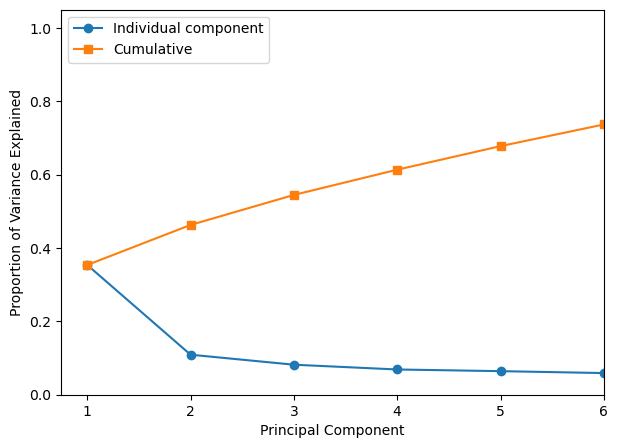

In [421]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [422]:
##choose 2
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24
age,0.168598,-0.240408,0.158960,-0.284249,-0.606741,-0.576431,-0.095853,0.106189,0.200896,0.025866,...,0.079379,0.070998,0.009479,-0.000396,-0.056716,-0.004420,0.044788,-0.011473,-0.024484,-0.009789
bp,0.171513,-0.128128,0.058131,-0.531900,-0.286360,0.675904,0.305385,0.088047,0.106973,0.036870,...,-0.021728,0.015403,0.002121,0.001481,-0.018820,0.049392,0.041880,0.014880,0.021211,-0.015823
sg,-0.297049,0.072605,0.200349,-0.135612,0.013405,-0.022545,-0.031016,0.708320,-0.516423,0.221372,...,0.010704,0.033268,-0.061652,0.038359,0.014671,-0.019687,0.039740,-0.015474,0.024731,0.018353
al,0.294427,-0.004966,-0.236783,0.123125,0.279043,0.005266,-0.007804,0.563655,0.551865,0.052240,...,-0.168072,0.104700,0.023141,-0.182357,-0.035916,-0.012670,0.079979,0.006249,-0.025348,-0.079295
su,0.200541,-0.555095,0.280059,0.083332,0.222416,0.082062,0.003858,-0.062628,-0.144108,-0.116710,...,0.170558,0.040022,0.056437,-0.023898,-0.002278,-0.036093,-0.085817,-0.090006,-0.001515,-0.012432
rbc,-0.082631,-0.003949,0.041317,-0.012053,0.030427,-0.057673,0.058811,-0.029175,-0.062101,0.027810,...,-0.026994,-0.174250,0.533577,-0.258664,0.162791,0.541196,0.429837,-0.166357,-0.191723,-0.082681
pc,-0.100789,-0.011799,0.044124,0.004317,-0.061693,-0.013476,0.035741,-0.107091,-0.081218,-0.024059,...,-0.392437,0.361423,0.032594,-0.494486,-0.175594,0.162175,-0.018213,0.160482,0.486748,0.206826
pcc,0.047985,-0.017851,-0.049619,0.026727,0.007778,-0.025811,0.000077,0.062620,0.059739,0.017995,...,0.278652,-0.259502,0.062176,0.049676,0.432969,-0.011480,0.038503,0.108815,0.740325,0.057990
ba,0.025758,-0.003172,-0.031235,0.004966,0.019068,0.009022,0.012699,0.046422,0.061534,-0.014641,...,0.120186,-0.021474,-0.098479,-0.023089,0.100456,0.119658,-0.003453,0.035974,-0.233725,0.933948
bgr,0.216002,-0.522655,0.191742,0.227184,0.111167,0.085952,-0.176952,0.090679,-0.162280,-0.047176,...,-0.066185,0.002112,-0.021582,-0.023281,-0.118231,0.068892,0.040966,0.016413,0.026522,0.018901


In [423]:
PCA_var=sum(pca_X.explained_variance_ratio_[0:2])
PCA_var

0.46303809324004974

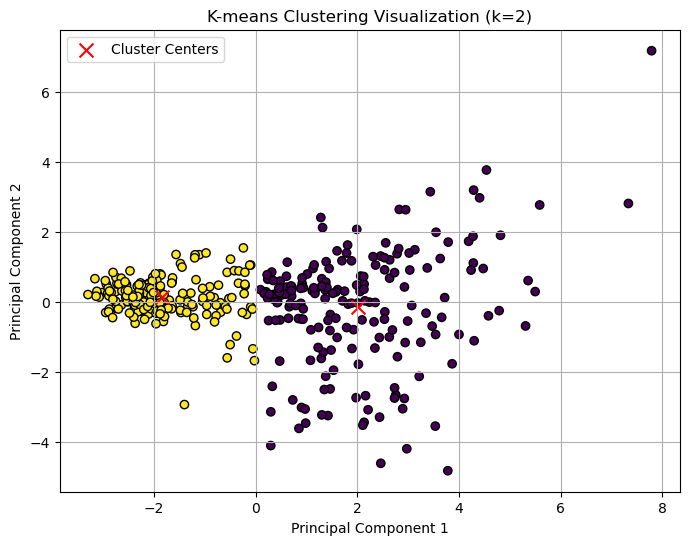

In [434]:
plt.figure(figsize=(8, 6))

principal_components = pca_X.fit_transform(X)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot data points
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')

plt.title('K-means Clustering Visualization (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [433]:
y_1d = np.ravel(y)

adjusted_Rand_index = adjusted_rand_score(y_1d, cluster_labels)

adjusted_Rand_index


0.3441958779405353

[github link]("https://github.com/Zichuan66/Assignment-6")